In [1]:
import numpy as np
import pandas as pd
#les valeurs manquantes 
import missingno 
#les graphes
import matplotlib.pyplot as plt 
import seaborn as sns
#la découpage des données 
from sklearn.model_selection import train_test_split,KFold
#la standardisation 
from sklearn.preprocessing import StandardScaler
#K-NN
from sklearn.neighbors import KNeighborsClassifier
#Gridsearch et cross valide
from sklearn.model_selection import GridSearchCV
#DecisionTree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
#random forest
from sklearn.ensemble import RandomForestClassifier
#regression logistique
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import random
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
import networkx as nx
#La normalisation
from sklearn.preprocessing import normalize
# Pairwise distance
from sklearn.metrics import pairwise_distances
import networkx
from networkx.algorithms import community 
from sklearn import preprocessing
import community as community_louvain

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_vin = pd.read_csv('winequality-red.csv')

In [3]:
data_vin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Pour savoir les données manquantes

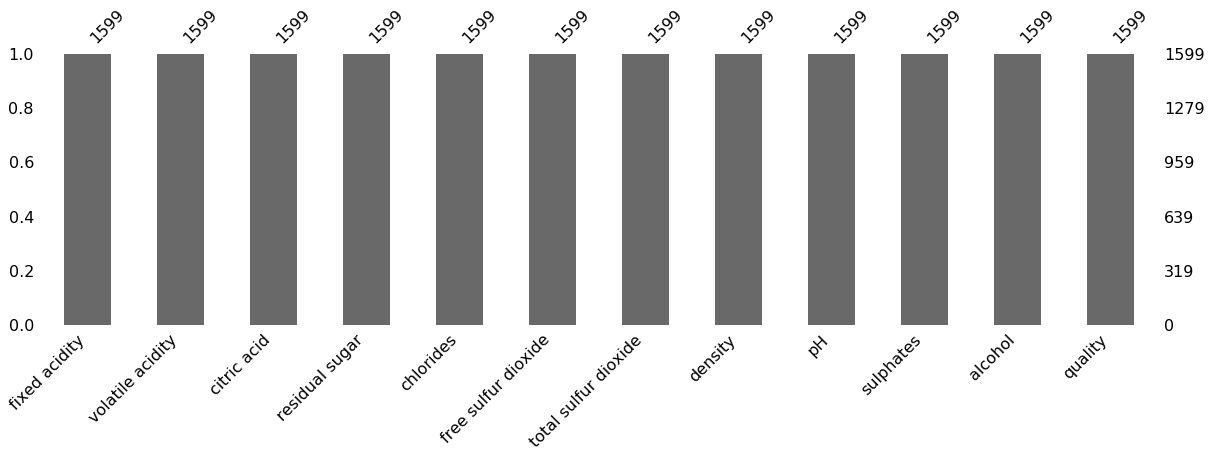

In [4]:
missingno.bar(data_vin, sort='ascending', figsize = (20,5)) 

### Nous avons 1599 valeurs, 12 variables(colonnes) et toutes les variables sont en numérique. 

#### 0   fixed acidity :   L'acidité fixé    

#### 1   volatile acidity : L'acidité volatile

#### 2   citric acid : L'acide citrique     

#### 3   residual sugar : Le sucre résiduel      

#### 4   chlorides : Les clorures           

#### 5   free sulfur dioxide : Le So2 libre

#### 6   total sulfur dioxide : Le So2 total

#### 7   density : La dentisité             

#### 8   pH : La valeur pH                 

#### 9   sulphates : Les sulphates       

#### 10  alcohol : L'alcool              

#### 11  quality : La qualité du vin                

In [5]:
data_vin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Les catégories de la qualité du vin et sa distribution.

#### Il y a 6 catégories de la qualité du vin rouge : 3, 4, 5, 6, 7, 8. Mais la plus part de vin se situe à la classe 5 et 6. 

In [6]:
data_vin['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

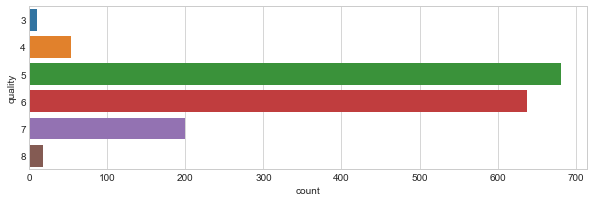

In [7]:
plt.style.use('seaborn-whitegrid')  
plt.figure(figsize=(10,3))   
sns.countplot(y='quality', data=data_vin)

#### Nous trouvons que l'alcool et les sulphats ont la forte correlation positive avec la variable expliqué(Qualité). 

#### Et que l'acidité volatile a la forte correction négative avec la variable expliqué.

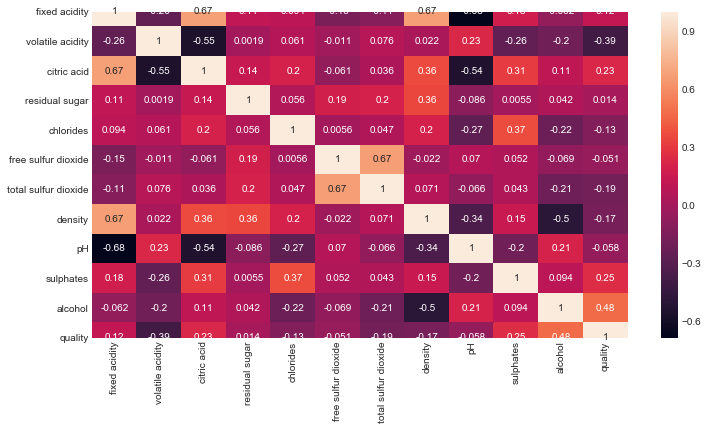

In [8]:
plt.figure(figsize = (12,6))
sns.heatmap(data_vin.corr(),annot=True)

In [9]:
data_vin.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

#### On apprend que la qualité du vin est divisée en 0-10, ce qui est trop large et trop détaillé Afin de faciliter le classement après modelage, la qualité est divisée en trois niveaux: inférieur, ordinaire et supérieur.

In [10]:
def Quality(e):
    if e>0 and e<=5:
        return 'Non recommondé'
    else :
        return 'recommondé'
data_vin['Quality'] = data_vin['quality'].map(Quality)
data_vin.drop(['quality'],axis=1,inplace=True)

In [11]:
data_vin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Non recommondé
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Non recommondé
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Non recommondé
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,recommondé
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Non recommondé


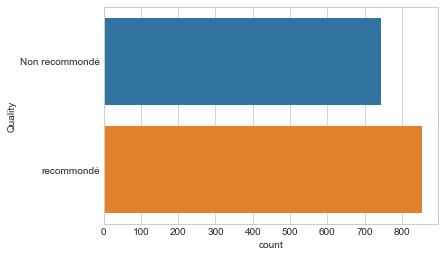

In [12]:
sns.countplot(y='Quality', data=data_vin)

In [13]:
data_vin['Quality'].value_counts()

recommondé        855
Non recommondé    744
Name: Quality, dtype: int64

### Découpage des données ：

In [14]:
x = data_vin.drop('Quality',axis=1).values
y = data_vin['Quality'].values

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 6)
# jeu d'apprentissage 80%, jeu de test 20%. 

#### La standardisation :

In [16]:
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

### La modélisation :

#### K-NN :

In [17]:
#estimateur de K-NN
estimateur_knn = KNeighborsClassifier()
#gridsearch et CV
param_dict = {'n_neighbors':[i for i in range(1,16)]}
estimateur_knn = GridSearchCV(estimateur_knn,param_grid=param_dict,cv = 10)
estimateur_knn.fit(x_train,y_train)
#L'évaluation de modèle
#1)La comparaison entre les valeur real et les valeurs prédites
y_predict_knn = estimateur_knn.predict(x_test)
print('La comparaison booléenne:\n',y_predict_knn==y_test)
#2)pour voir l'accuracy
score_knn = estimateur_knn.score(x_test,y_test)
print('L\'accuracy:\n',score_knn)
#Le meilleur modèle
print('Le meilleur résultat:\n',estimateur_knn.best_estimator_)

La comparaison booléenne:
 [ True False False False  True  True  True  True  True False  True  True
  True  True False False  True  True  True  True  True False  True  True
  True  True  True False  True  True  True False False False  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True False False  True  True  True  True  True  True False  True  True
  True  True  True  True False False  True  True False  True  True  True
  True  True False  True False  True  True  True  True False False  True
  True  True  True  True False  True  True  True False  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
 False  True False  True  True  True  True  True  True False  True False
  True  True  True  True False  True  True  True  True  True  True False
  True False False  True  True  True  True  True  True False  True  True
 False  True False  True

#### Decision Tree :

In [18]:
estimateur_DT = DecisionTreeClassifier(criterion='entropy')
estimateur_DT.fit(x_train,y_train)
#L'évaluation de modèle
y_predict_DT = estimateur_DT.predict(x_test)
#1)La comparaison entre les valeurs real et les valeurs prédites
print('La comparaison booléen:\n',y_predict_DT==y_test)
#2)L'accuracy
score_DT = estimateur_DT.score(x_test,y_test)
print('L\'accuracy:\n',score_DT)

La comparaison booléen:
 [ True  True False  True  True  True  True  True  True False  True False
 False  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True False False False  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True False False  True  True  True  True  True  True
  True  True  True  True False  True False  True False False False  True
  True  True  True  True False False  True  True  True  True  True  True
  True  True  True False  True  True  True  True False  True False False
 False  True  True  True  True  True  True  True  True False  True False
  True  True  True  True False  True False  True  True  True  True False
  True  True  True  True  True  True False False  True  True  True  True
 False  True False  True  

### Regression logistique

In [19]:
#creation du modele sans l'entrainer
model_LR = LogisticRegression(solver="liblinear", class_weight="balanced")

#entrainement
model_LR.fit(x_train,y_train)

# Test
y_pred_LR = model_LR.predict(x_test)

# recuperation de la matrice de confusion
matrix_LR = confusion_matrix(y_test,y_pred_LR)

#pour afficher la matrice de confusion
print(matrix_LR)

[[125  34]
 [ 52 109]]


In [20]:
score_rl = model_LR.score(x_test,y_test)
print('L\'accuracy:\n',score_rl)

L'accuracy:
 0.73125


                precision    recall  f1-score   support

Non recommondé       0.71      0.79      0.74       159
    recommondé       0.76      0.68      0.72       161

      accuracy                           0.73       320
     macro avg       0.73      0.73      0.73       320
  weighted avg       0.73      0.73      0.73       320



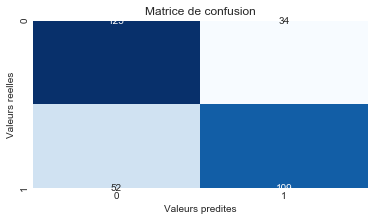

In [21]:
# pareil mais en mieux
sns.heatmap(matrix_LR, square=True, annot=True,cbar=False, fmt='g', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel("Valeurs predites")
plt.ylabel("Valeurs reelles")
#plt.show()

class_report = classification_report(y_test,y_pred_LR)
print(class_report)

In [22]:
#recuperation du recall moyen [VP/(VP+FN) + (VN/(VN+FP)]/2
precision, recall,fscore,support = score(y_test, y_pred_LR, average='macro')
print(recall)

0.7315910777764756


In [23]:
table_accuracy = pd.DataFrame()
table_accuracy['Les modèles'] = ['KNN','Décision tree','Regression logistique']
table_accuracy['L\'accuracy'] = [score_knn,score_DT,score_rl]
print(table_accuracy)

             Les modèles  L'accuracy
0                    KNN    0.768750
1          Décision tree    0.796875
2  Regression logistique    0.731250


### L'aprentissage avec tout les variables

In [24]:
def apprentissage(x,y):
    #print("Debut du KFold")
    NOMBRE_KFOLD = 10

    Kf = KFold(n_splits=NOMBRE_KFOLD)
    Kf.get_n_splits(x)
    moyenne = 0
    for train_index, test_index in Kf.split(x):
        #print("Train :", train_index, "Test :", test_index)
        x_train=x[train_index]
        y_train=y[train_index]
        x_test=x[test_index]
        y_test=y[test_index]
        model_LR = LogisticRegression(solver="liblinear", class_weight="balanced")
        model_LR.fit(x_train, y_train)
        y_pred_LR = model_LR.predict(x_test)
        matrix_LR = confusion_matrix(y_test, y_pred_LR)
        #print(matrix_LR)
        precision, recall,fscore,support = score(y_test, y_pred_LR, average='macro',zero_division=0)
        #print(recall)
        moyenne = moyenne + recall

    moyenne = moyenne / NOMBRE_KFOLD
    return moyenne

In [25]:
print("Resultat de l'apprentissage avec toutes les variables : ", apprentissage(x,y))

Resultat de l'apprentissage avec toutes les variables :  0.7051445754698685


###  L'apprentissage avec le choix des colonnes aleatoire

In [26]:
# Afficher la liste des variables
colonnes = list(data_vin.columns)

# Enlever un element de la liste
colonnes.remove("Quality")

# Exemple de generation de listes aleatoires : au moins une variable, au maximum toutes les variables
for i in range(10):
    print(random.sample(colonnes,random.randint(1,len(colonnes))))


['chlorides', 'sulphates', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'total sulfur dioxide', 'pH', 'density', 'residual sugar']
['chlorides', 'residual sugar']
['citric acid', 'fixed acidity', 'pH', 'density', 'volatile acidity']
['sulphates', 'chlorides']
['free sulfur dioxide']
['sulphates', 'residual sugar', 'citric acid', 'density', 'fixed acidity', 'total sulfur dioxide', 'free sulfur dioxide', 'alcohol', 'pH', 'volatile acidity', 'chlorides']
['alcohol', 'pH', 'sulphates', 'volatile acidity', 'free sulfur dioxide', 'citric acid', 'total sulfur dioxide', 'residual sugar', 'chlorides']
['citric acid']
['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'fixed acidity', 'pH', 'chlorides', 'citric acid', 'free sulfur dioxide', 'density']
['free sulfur dioxide', 'fixed acidity', 'total sulfur dioxide', 'citric acid', 'density', 'chlorides']


In [27]:
# On realise Un certain nombre d'apprentissages en selectionnant aleatoirement les variables utilisees
best_score = 0
best_variables = []
for i in range(100):
    variables = random.sample(colonnes, random.randint(1, len(colonnes)))
    variables_a_supprimer = list(set(colonnes)-set(variables))+["Quality"]
    x = data_vin.drop(variables_a_supprimer, axis=1).values
    resultat = apprentissage(x,y)
    if(resultat>best_score):
        best_score = resultat
        best_variables = variables.copy()
        print("Resultat de l'apprentissage : ", resultat)
print("Meilleur apprentissage realise avec les variables suivantes : ")
print(best_variables)
print("Liste des variables qui perturbent la qualite predictive : ")
print(list(set(colonnes)-set(best_variables)))

Resultat de l'apprentissage :  0.7041757359893033
Resultat de l'apprentissage :  0.7060408089902361
Resultat de l'apprentissage :  0.7063997892311737
Resultat de l'apprentissage :  0.7123041712358849
Resultat de l'apprentissage :  0.71330486028483
Meilleur apprentissage realise avec les variables suivantes : 
['alcohol', 'sulphates', 'citric acid', 'free sulfur dioxide', 'volatile acidity', 'chlorides']
Liste des variables qui perturbent la qualite predictive : 
['total sulfur dioxide', 'residual sugar', 'density', 'fixed acidity', 'pH']


### L'algorithme genetique

In [28]:
def generation_population_initiale(taille,colonnes):
    population = []
    for i in range(taille):
        individu = [random.randint(0,1) for i in range(len(colonnes))]
        population.append(individu)
    return population


In [29]:
def reproduction(population):
    taille_individu = len(population[0]) # taille d'un individu
    #print("taille d'un individu",taille_individu)
    couples = [i for i in range(len(population))]
    #print(couples)
    random.shuffle(couples)
    #print(couples)
    for i in range(len(couples)//2):
        #print(couples[i*2],couples[i*2+1])
        coupe = random.randint(1,taille_individu)
        #print(coupe)
        #print("Voici le couple ",i, ":")
        #print(couples[i*2], "et", couples[i*2+1])
        #print(population[couples[i*2]])
        #print(population[couples[i * 2+1]])
        #print("On coupe a l'indice ", coupe)
        #print("Leur enfant est le suivant :")
        #print(population[couples[i*2]][0:coupe]+population[couples[i*2+1]][coupe:])
        population.append(population[couples[i*2]][0:coupe]+population[couples[i*2+1]][coupe:])
    return population

In [30]:
def mutation(population, nb_mutants, nb_mutations):
    taille_individu = len(population[0])
    for i in range(nb_mutants):
        m = random.randint(0,len(population)-1)
        copie = population[m].copy()
        for j in range(nb_mutations):
            gene = random.randint(0,taille_individu-1)
            #print(population[m])
            #print(gene)
            if copie[gene] == 0:
                copie[gene] = 1
            else:
                copie[gene] = 0
        population.append(copie)
    return population


In [31]:
def selection(colonnes, population,x,y):
    taille_individu = len(population[0])
    resultat_scores = {}
    for i in range(len(population)):
        variables = []
        #print(population[i])
        for j in range(taille_individu):
            if population[i][j] == 1:
                variables.append(colonnes[j])
        #print(variables)
        variables_a_supprimer = list(set(colonnes) - set(variables)) + ["Quality"]
        x = data_vin.drop(variables_a_supprimer, axis=1).values
        resultat = apprentissage(x, y)
        resultat_scores[i] = resultat
        #print(resultat)
    #print(resultat_scores)
    #print(len(population))
    for i in range(len(population)//2):
        minimum = min(resultat_scores,key=resultat_scores.get)
#        print(minimum, len(population))
#        population.pop(minimum)
        del resultat_scores[minimum]

    nouvelle_population = []
    for i in resultat_scores:
        nouvelle_population.append(population[i].copy())
        maximum = max(resultat_scores, key=resultat_scores.get)
    return (resultat_scores[maximum], resultat_scores,nouvelle_population)
#        print(len(resultat_scores),"resu")
        #print(min(resultat_scores,key=resultat_scores.get))
#    print(population)
#    print(len(population))


population = generation_population_initiale(10,colonnes)

In [32]:
for i in range(300):
    population = reproduction(population)
    population = mutation(population,5,3)
    (maximum,resultat_scores,population) = selection(colonnes,population,x,y)
    print(maximum)
    #print(score)


# Exemple de slice pour les listes. Tres pratique !
#exemple=[0,1,2,3,4,5,6,7,8,9]
#print(exemple)
#print(exemple[2:6])

0.681454593671017
0.7152495107437151
0.7152495107437151
0.7152495107437151
0.7152495107437151
0.7152495107437151
0.7152495107437151
0.7153704380690196
0.7153704380690196
0.7153704380690196
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0.718116383871888
0

In [ ]:
resultat_scores

In [34]:
population

[[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]]

### Theorie graph 

In [35]:
data_vin.columns.values.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'Quality']

#### (1) Prétraitement des données

In [45]:
def Quality1(e):
    if e== 'Non recommondé':
        return 0
    else :
        return 1
data_vin['Quality1'] = data_vin['Quality'].map(Quality1)
data_vin.drop(['Quality'],axis=1,inplace=True)

In [52]:
variables_numeriques = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
                        'density', 'pH','sulphates','alcohol']
variables_categorielles = [ 'Quality1']
variable_cible = 'Quality1'
for v in variables_categorielles: 
  data_vin[v] = data_vin[v].astype('category')
for v in variables_numeriques :
  data_vin[v] = (data_vin[v] - data_vin[v].min()) / (data_vin[v].max() - data_vin[v].min())

data_vin.info()
data_vin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  Quality1              1599 non-null   category
 12  communaute            1599 non-null   int64   
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality1,communaute
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1,2
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0,2


In [53]:
def distance(data_vin,a,b,variables_numeriques, variables_categorielles, seuil):
  d = 0
  for v in variables_categorielles:
    if data_vin[v][a] != data_vin[v][b]:
      d = d + 1
  for v in variables_numeriques:
    if abs(data_vin[v][a] - data_vin[v][b]) > seuil:
      d = d + 1
  return d

#### (2) Résultat

C:\Users\lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


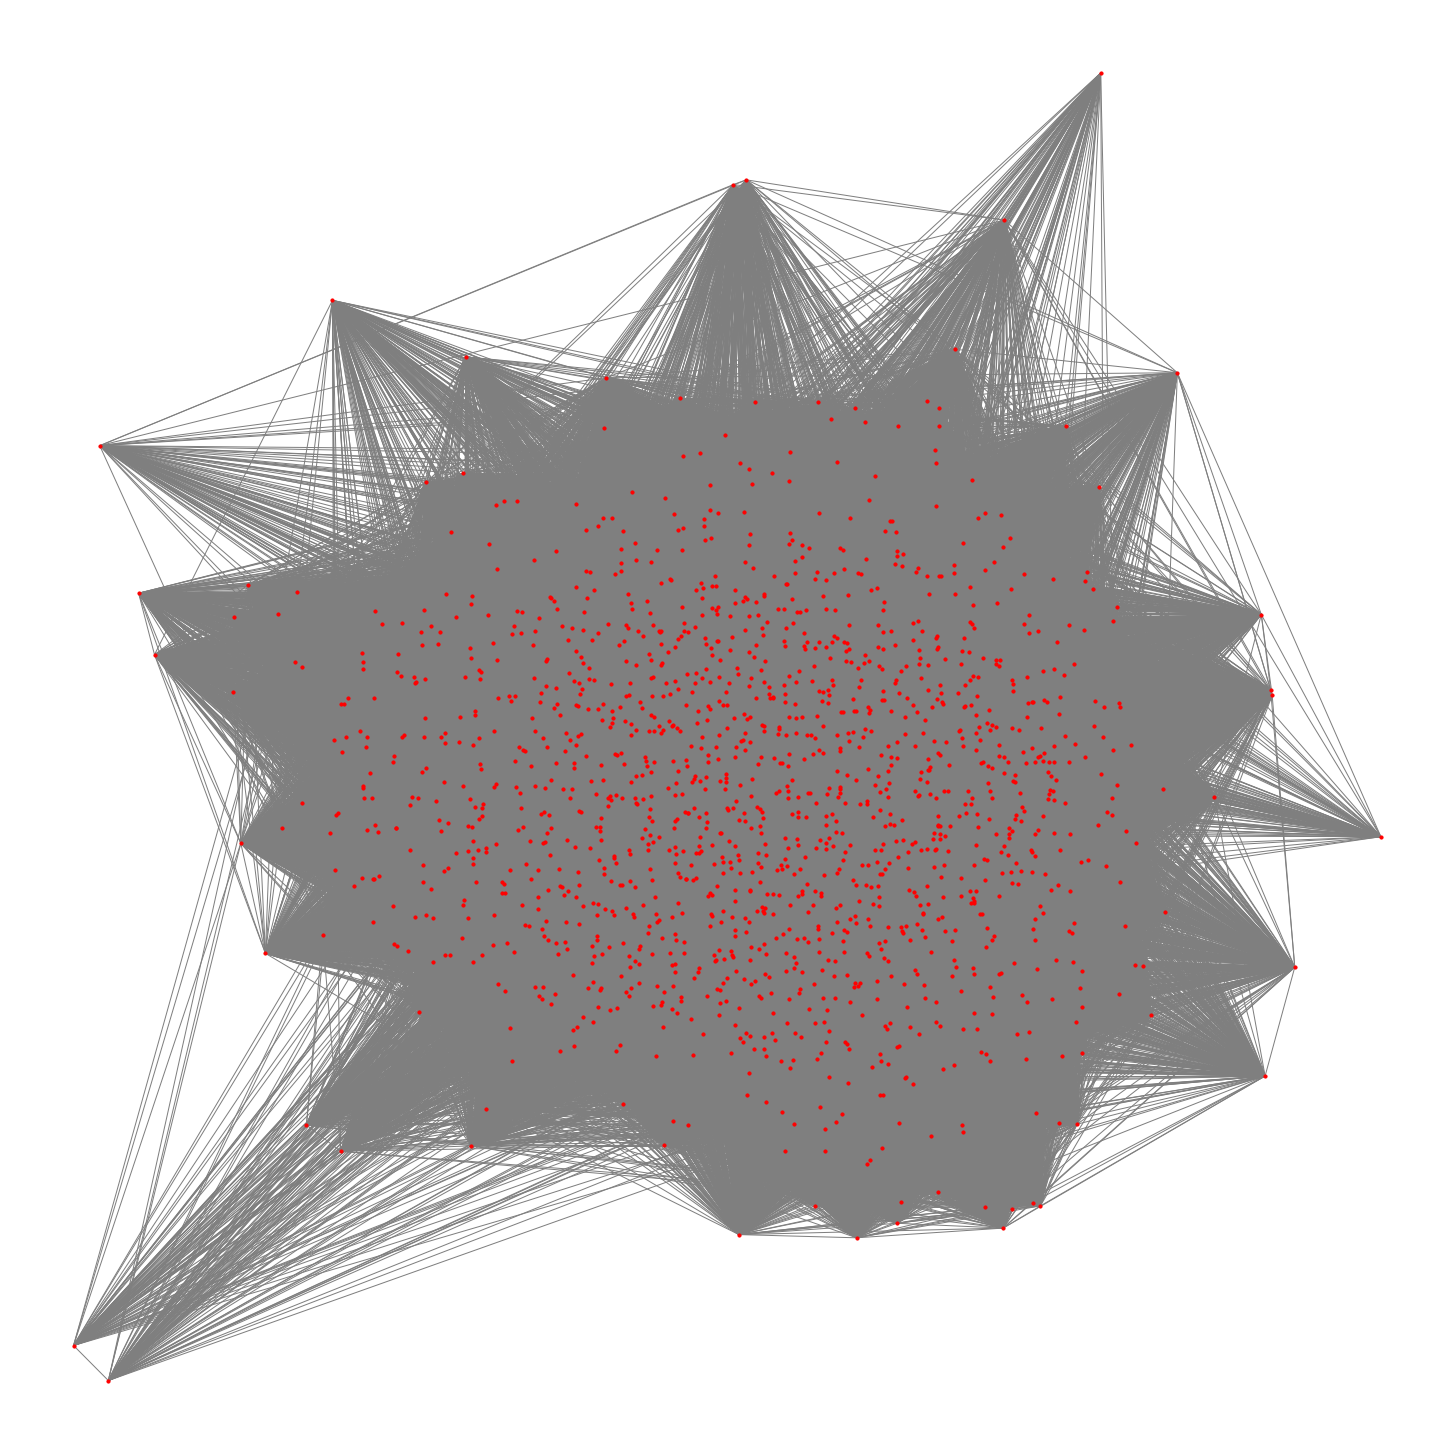

In [54]:
def generation_graphe(data_vin,variables_categorielles, variables_numeriques, seuil_arete, seuil_distance):
  G = networkx.Graph()
  (nb_lignes, nb_col) = data_vin.shape
  for a in range(nb_lignes):
    for b in range(a+1, nb_lignes):
      if distance(data_vin, a,b, variables_numeriques,variables_categorielles,seuil_distance)<=seuil_arete:
        G.add_edge(a,b)
  return G
#  for x in data:
#    print(x)
#print(data["sex"][0])
G = generation_graphe(data_vin,variables_categorielles, variables_numeriques, 4,0.2)
options = {
      'node_color' : 'red',
      'node_size'  : 10,
      'edge_color' : 'tab:gray',
      'with_labels': False
    }
plt.figure(figsize=(20,20))
pos = networkx.spring_layout(G,k=0.1)
networkx.draw(G,pos,**options)
plt.show()

#### (3)L'algorithme détection de communauté

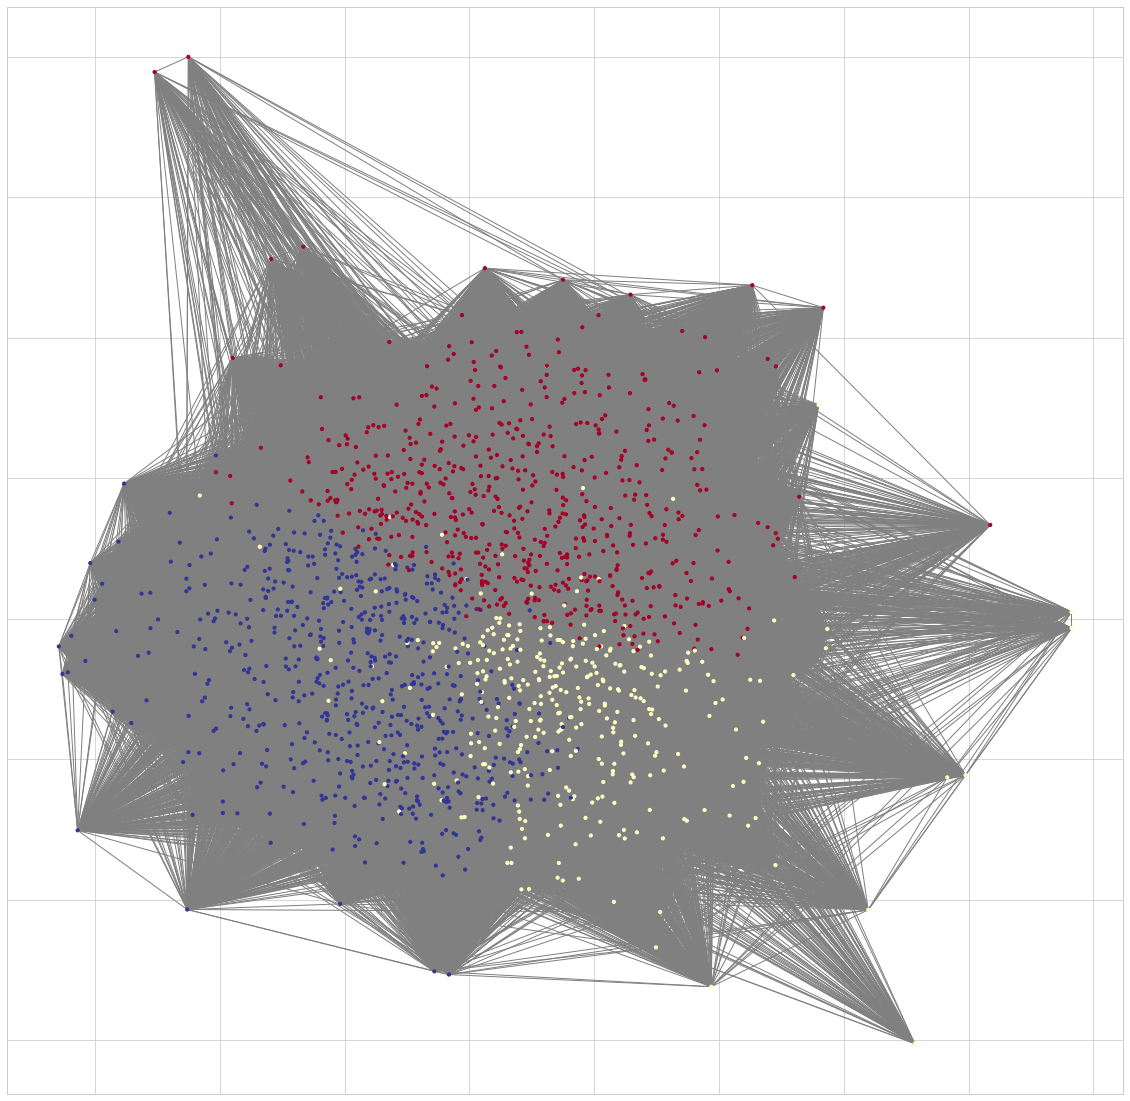

In [55]:
partition = community_louvain.best_partition(G)

# affichage graphe avec communautés 

position = networkx.spring_layout(G,k=0.1)
plt.figure(figsize=(20,20))
networkx.draw_networkx_nodes(G, position,          
          cmap=plt.cm.RdYlBu,node_size = 10,
          node_color=list(partition.values()))
# Les traits
networkx.draw_networkx_edges(G, position, edge_color="gray") 
plt.show(G)

In [56]:
print(partition)
groupes = set(partition.values())
print(groupes)

# Transformation de la partition en une liste contenant pour chaque partition la liste des sommets qui la composent.
liste_sommets_partition = []
for g in groupes:
  liste_sommets = []
  for n in partition:
    if partition[n] == g:
      liste_sommets.append(n)
  liste_sommets_partition.append(liste_sommets)
print(liste_sommets_partition)
data_vin["communaute"] = list(partition.values())
data_vin.head()

{0: 2, 1: 2, 2: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 1, 10: 2, 11: 1, 12: 2, 13: 1, 14: 1, 15: 1, 17: 1, 18: 2, 20: 0, 21: 1, 22: 1, 23: 1, 24: 2, 25: 2, 26: 1, 27: 1, 28: 2, 29: 2, 30: 2, 31: 2, 32: 1, 33: 2, 34: 2, 35: 2, 36: 2, 37: 0, 38: 2, 39: 1, 40: 1, 41: 1, 42: 0, 43: 1, 44: 2, 45: 2, 46: 1, 47: 0, 48: 2, 49: 1, 50: 1, 51: 2, 52: 2, 54: 2, 55: 2, 56: 0, 57: 1, 58: 2, 59: 2, 60: 1, 61: 1, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 0, 69: 2, 70: 2, 71: 2, 72: 2, 73: 1, 74: 1, 75: 0, 76: 0, 77: 2, 78: 2, 79: 1, 80: 2, 81: 1, 82: 1, 83: 1, 84: 0, 85: 2, 87: 1, 89: 2, 90: 1, 92: 1, 93: 1, 94: 2, 96: 2, 97: 1, 98: 2, 99: 0, 100: 0, 101: 0, 102: 0, 103: 1, 104: 2, 105: 1, 106: 1, 107: 2, 108: 0, 109: 1, 110: 1, 111: 1, 112: 1, 113: 0, 114: 1, 115: 0, 116: 0, 117: 2, 118: 0, 119: 2, 120: 2, 121: 0, 122: 2, 123: 2, 124: 2, 125: 1, 126: 2, 127: 2, 128: 2, 129: 2, 130: 1, 131: 2, 132: 2, 133: 2, 134: 2, 135: 1, 136: 1, 137: 1, 138: 2, 139: 2, 140: 1, 141: 1, 143: 2, 145: 1, 146: 2, 147:

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality1,communaute
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1,2
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0,2


In [57]:
for nb_partition in range(len(liste_sommets_partition)):
  print("Partition ",nb_partition)
  nb_morts = 0
  for n in liste_sommets_partition[nb_partition]:
    nb_morts = nb_morts + data_vin[variable_cible][n]
  print(nb_morts, "morts /",len(liste_sommets_partition[nb_partition]))

Partition  0
500 morts / 617
Partition  1
48 morts / 340
Partition  2
307 morts / 642


### Reprenons l'algorithme génétique avec la théorie graph 

In [58]:
variables_numeriques = ['fixed acidity','volatile acidity','citric acid','residual sugar','total sulfur dioxide',
                        'density','sulphates','alcohol']

#### Résultat

C:\Users\lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


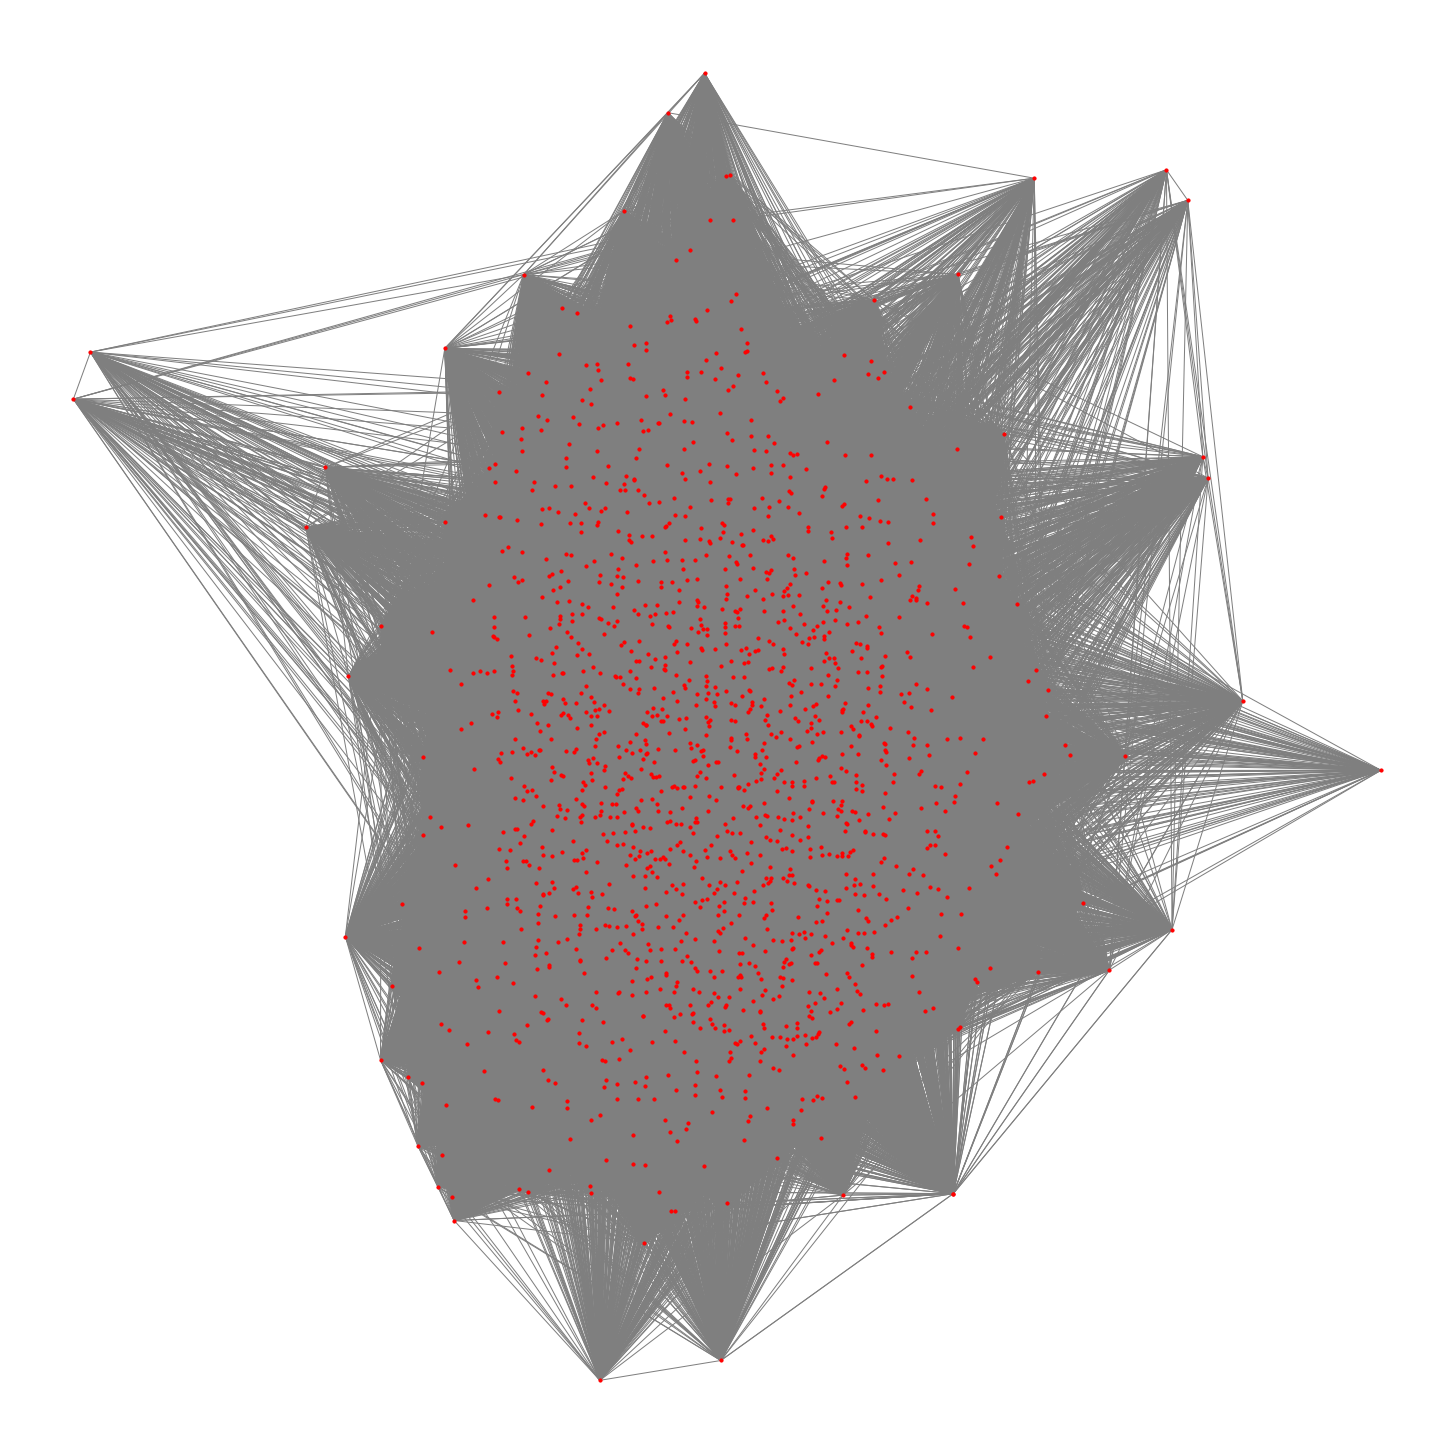

In [59]:
plt.figure(figsize=(20,20))
pos = networkx.spring_layout(G,k=0.1)
networkx.draw(G,pos,**options)
plt.show()

#### L'algorithme détection de communauté

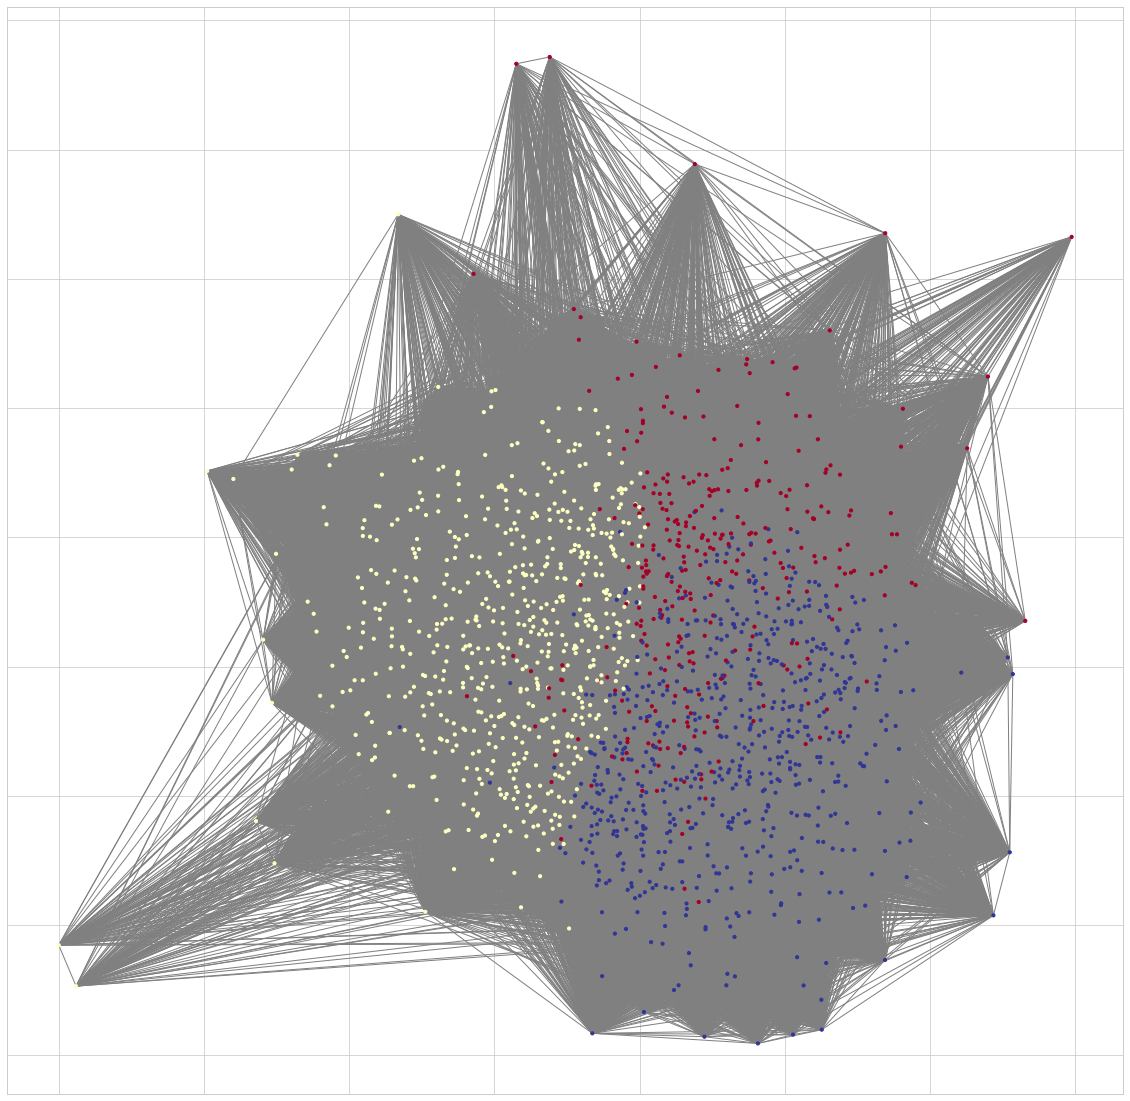

In [60]:
partition = community_louvain.best_partition(G)

# affichage graphe avec communautés 

position = networkx.spring_layout(G,k=0.1)
plt.figure(figsize=(20,20))
networkx.draw_networkx_nodes(G, position,          
          cmap=plt.cm.RdYlBu,node_size = 10,
          node_color=list(partition.values()))
# Les traits
networkx.draw_networkx_edges(G, position, edge_color="gray") 
plt.show(G)

In [61]:
print(partition)
groupes = set(partition.values())
print(groupes)

# Transformation de la partition en une liste contenant pour chaque partition la liste des sommets qui la composent.
liste_sommets_partition = []
for g in groupes:
  liste_sommets = []
  for n in partition:
    if partition[n] == g:
      liste_sommets.append(n)
  liste_sommets_partition.append(liste_sommets)
print(liste_sommets_partition)
data_vin["communaute"] = list(partition.values())
data_vin.head()

{0: 2, 1: 2, 2: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 0, 10: 2, 11: 0, 12: 2, 13: 0, 14: 0, 15: 0, 17: 0, 18: 2, 20: 1, 21: 0, 22: 0, 23: 0, 24: 2, 25: 2, 26: 0, 27: 0, 28: 2, 29: 2, 30: 2, 31: 2, 32: 0, 33: 2, 34: 2, 35: 2, 36: 2, 37: 1, 38: 2, 39: 0, 40: 0, 41: 0, 42: 1, 43: 0, 44: 2, 45: 2, 46: 0, 47: 1, 48: 2, 49: 0, 50: 0, 51: 2, 52: 2, 54: 2, 55: 2, 56: 1, 57: 0, 58: 2, 59: 2, 60: 0, 61: 0, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 1, 69: 2, 70: 2, 71: 2, 72: 2, 73: 0, 74: 0, 75: 1, 76: 1, 77: 2, 78: 2, 79: 0, 80: 2, 81: 0, 82: 0, 83: 0, 84: 1, 85: 2, 87: 0, 89: 2, 90: 0, 92: 0, 93: 0, 94: 2, 96: 2, 97: 0, 98: 2, 99: 1, 100: 1, 101: 1, 102: 1, 103: 0, 104: 2, 105: 0, 106: 0, 107: 2, 108: 1, 109: 0, 110: 0, 111: 0, 112: 0, 113: 1, 114: 0, 115: 1, 116: 1, 117: 2, 118: 1, 119: 2, 120: 2, 121: 1, 122: 2, 123: 2, 124: 2, 125: 0, 126: 2, 127: 2, 128: 2, 129: 2, 130: 0, 131: 2, 132: 2, 133: 2, 134: 2, 135: 0, 136: 0, 137: 0, 138: 2, 139: 2, 140: 0, 141: 0, 143: 2, 145: 0, 146: 2, 147:

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality1,communaute
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1,2
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0,2


In [62]:
for nb_partition in range(len(liste_sommets_partition)):
  print("Partition ",nb_partition)
  nb_morts = 0

  for n in liste_sommets_partition[nb_partition]:
    nb_morts = nb_morts + data_vin[variable_cible][n]
  print(nb_morts, "morts /",len(liste_sommets_partition[nb_partition]))

Partition  0
48 morts / 340
Partition  1
500 morts / 617
Partition  2
307 morts / 642
